# Intermediate Neural Network in TensorFlow

In [ ]:
import tensorflow as tf

Viewing all libraries installed on the system

In [ ]:
!pip freeze | grep tensorflow

tensorflow==2.12.0
tensorflow-datasets==4.9.2
tensorflow-estimator==2.12.0
tensorflow-gcs-config==2.12.0
tensorflow-hub==0.14.0
tensorflow-io-gcs-filesystem==0.33.0
tensorflow-metadata==1.14.0
tensorflow-probability==0.20.1


To specify a specific version of tensorflow, the command underneath can be used.(if required)

In [ ]:
# !pip install tensorflow==2.0.0-beta0

Change the type of runtime to GPU and not TPU

MNIST Dataset being used in this notebook(28 by 28 in size and 28 bits)

# The Architecture of Neural Network (Shallow neural network architecture) for this project are as followed:

*   Input: 28 * 28 = 784
*   Hidden layer: 64 Sigmoid neurons
*   Output layer: 10 softmax neurons


Loading Dependencies

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

Load data

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

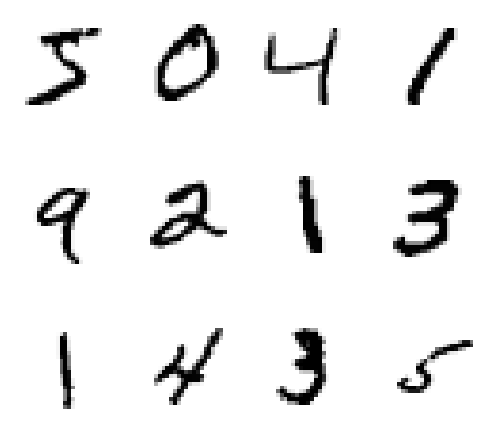

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(3,4,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

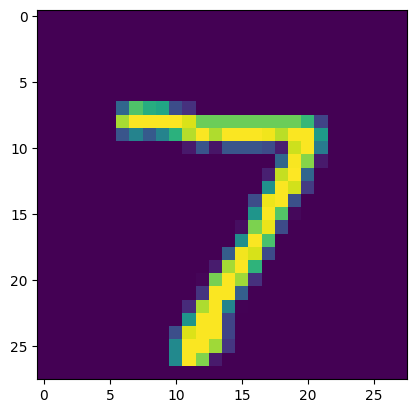

In [ ]:
plt.imshow(x_test[0])

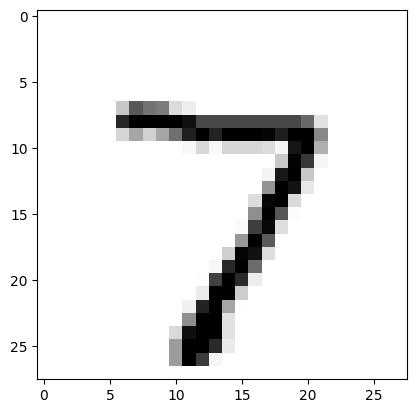

In [ ]:
plt.imshow(x_test[0],cmap='Greys')

Zero presents = white areas, 255 = black areas, between 0 and 255 will be grey areas

In [ ]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_test[0]

7

# Preprocess Data

In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

Reason to change to float is to create a mean of 0 and a standard deviation of 1 (it is common way in machine learning) to have a range of zero to one.

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Design NN architecture

In [ ]:
model = Sequential()
# Hidden Layer
model.add(Dense(64,activation='relu', input_shape = (784,)))
model.add(Dense(64,activation='relu'))
#Output Layer
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])

# Train Model
verbose = some visual output
epochs = number of times that we are going to cycle through the training data

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4434 - accuracy: 0.8736 - val_loss: 0.2391 - val_accuracy: 0.9293
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2227 - accuracy: 0.9350 - val_loss: 0.2097 - val_accuracy: 0.9345
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1709 - accuracy: 0.9501 - val_loss: 0.1513 - val_accuracy: 0.9542
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1404 - accuracy: 0.9587 - val_loss: 0.1445 - val_accuracy: 0.9546
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1201 - accuracy: 0.9645 - val_loss: 0.1158 - val_accuracy: 0.9654
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1046 - accuracy: 0.9693 - val_loss: 0.1198 - val_accuracy: 0.9637
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0943 - accuracy: 0.9725 - val_loss: 0.1021 - val_accuracy: 0.9687
Epoch 

# Evaluating Model Performance

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9758


[0.08138877153396606, 0.9757999777793884]

# Performing Inference

In [ ]:
valid_0 = x_test[0].reshape(1,784)

In [ ]:
model.predict(valid_0)

1/1 [==============================] - 0s 18ms/step


array([[7.1041488e-09, 3.8743016e-07, 1.2215762e-05, 6.5106848e-05,
        8.9136970e-12, 1.0171683e-08, 4.8456369e-12, 9.9992156e-01,
        3.3444846e-07, 3.2718114e-07]], dtype=float32)